In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

 # For df1:

Take a look at the data in df1.
Does x increase from time one to time two?
Visualize the relationship between x and time.
Run a statistical test to further examine the relationship between these features.

In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


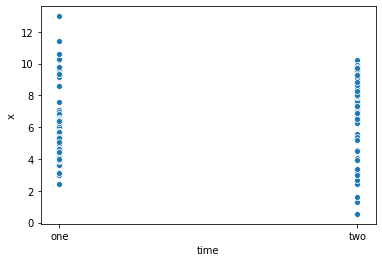

In [3]:
sns.scatterplot(data=df1, x='time', y='x')

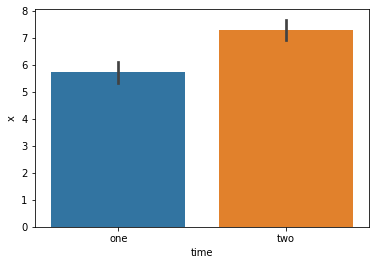

In [4]:
sns.barplot(data=df1, x='time', y='x')

In [5]:
df1['time'] = df1['time'].map({'one': 1, 'two': 2})

In [6]:
x = df1.time
y = df1.x

In [7]:
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)

r = 0.36081934184293457
p = 1.5320971681721565e-07


- Low P value shows there is a significant relationship between x and time.

 # For df2:

Take a look at the data in df2.
Visualize the relationship between x and y.
How would you describe the relationship between x and y?
Run a statistical test to examine the relationship between x and y.

In [8]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


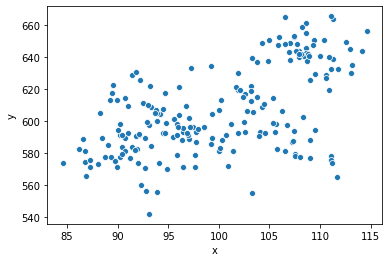

In [9]:
sns.scatterplot(data=df2, x='x', y='y')

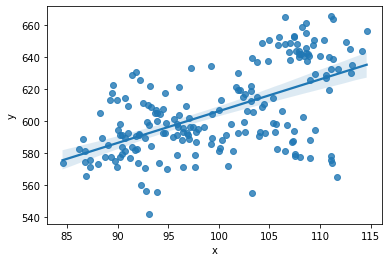

In [10]:
sns.regplot(data=df2, x='x', y='y')

In [11]:
x = df2.x
y = df2.y

In [12]:
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)

r = 0.5693902765694359
p = 1.3960403186191819e-18


- Low p-value and relatively high r means there is a significant relationship between the variables.

# For df3:

Take a look at the data in df3
Which surgeon has the higher success rate?
If you had to have heart bypass surgery, which surgeon should you go to?

In [13]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [14]:
df3.groupby(['surgery', 'success']).agg('count')

surgeon
surgery      success         
appendectomy 0             32
             1            451
heart bypass 0            171
             1            346

In [15]:
df3.groupby(['surgeon', 'success']).agg('count')

surgery
surgeon success         
A       0             59
        1            421
B       0            144
        1            376

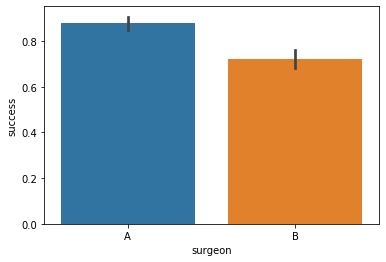

In [16]:
sns.barplot(data=df3, x='surgeon', y='success')

- I would definitely go with surgeon A.

In [17]:
observed = pd.crosstab(df3.surgeon, df3.success)
observed

success,0,1
surgeon,,
A,59,421
B,144,376


In [18]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 59 421]
 [144 376]]
---
Expected

[[ 97.44 382.56]
 [105.56 414.44]]
---

chi^2 = 35.6448
p     = 0.0000


 # For df1 and df2,
what happens to the relationships if you take into account the group feature?



In [19]:
df1.head()

,group,x,time
0,a,7.087113,1
1,a,5.164441,1
2,a,6.150206,1
3,a,3.732648,1
4,a,5.181035,1


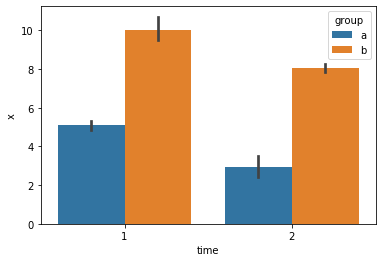

In [21]:
sns.barplot(x='time', y='x', hue='group', data=df1)


- Group B performs better in both situations.

In [22]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


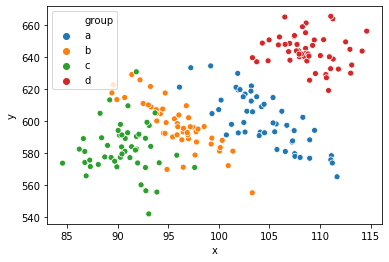

In [24]:
sns.scatterplot(x='x', y='y', hue='group', data=df2)
